<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/Medical_Text_Classification_%E2%80%94_LSTM%2C_BLSTM%2C_GRU%2C_BGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Embedding, Bidirectional
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

# **Partie 1**

In [3]:
df = pd.read_csv('medical_dataset.csv', delimiter=',', encoding='utf-8')

# Vérifier la structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  500 non-null    object
 1   transcription      500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,medical_specialty,transcription
0,Cardiology,Patient reports chest pain and shortness of br...
1,Pediatrics,"Child presents with fever and cough, possible ..."
2,Cardiology,EKG shows abnormal rhythms; consider further c...
3,Orthopedic,X-ray shows a fracture in the distal radius.
4,Surgery,"Surgical site infection noted, antibiotics adm..."


In [4]:
# Supprimer les lignes vides
df = df.dropna()

df.info()  # Vérifier qu'il n'y a plus de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  500 non-null    object
 1   transcription      500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


Séparer les labels et les textes

In [7]:
Y = df['medical_specialty']  # Labels
X = df['transcription']      # Textes

Encodage des labels en numérique

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

print("Exemples d'étiquettes encodées :", Y[:10])
print("Classes :", le.classes_)


Exemples d'étiquettes encodées : [0 4 0 3 7 7 5 4 7 3]
Classes : ['Cardiology' 'Gastroenterology' 'Neurology' 'Orthopedic' 'Pediatrics'
 'Psychiatry' 'Radiology' 'Surgery']


Tokenizer pour transformer le texte en séquences numériques

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 20

token = Tokenizer(num_words=max_words)
token.fit_on_texts(X)
sequences = token.texts_to_sequences(X)

# Padding pour uniformiser la longueur
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    sequences_matrix, Y, test_size=0.33, random_state=42
)

# **Partie 2**

**LSTM**

In [12]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=max_len))
model_lstm.add(LSTM(64, dropout=0.2))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(len(le.classes_), activation='softmax'))

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer=RMSprop(),
                   metrics=['accuracy'])

history_lstm = model_lstm.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_lstm = model_lstm.evaluate(X_test, Y_test)
print("✅ Accuracy LSTM :", score_lstm[1])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.2423 - loss: 2.0620 - val_accuracy: 0.3134 - val_loss: 1.9912
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4987 - loss: 1.9396 - val_accuracy: 0.3582 - val_loss: 1.8435
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5519 - loss: 1.7258 - val_accuracy: 0.4030 - val_loss: 1.5305
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6806 - loss: 1.3396 - val_accuracy: 0.8209 - val_loss: 1.1261
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8174 - loss: 0.9998 - val_accuracy: 0.9254 - val_loss: 0.7173
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9605 - loss: 0.6075 - val_accuracy: 0.9701 - val_loss: 0.4177
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9710 - loss: 0.3590 - val_accuracy: 1.0000 - val_loss: 0.3599
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.2288 - val_accuracy: 1.0000 - val_loss: 0.1656


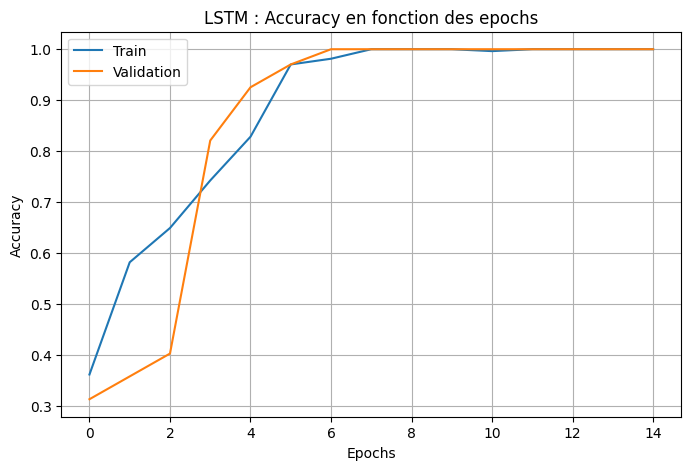

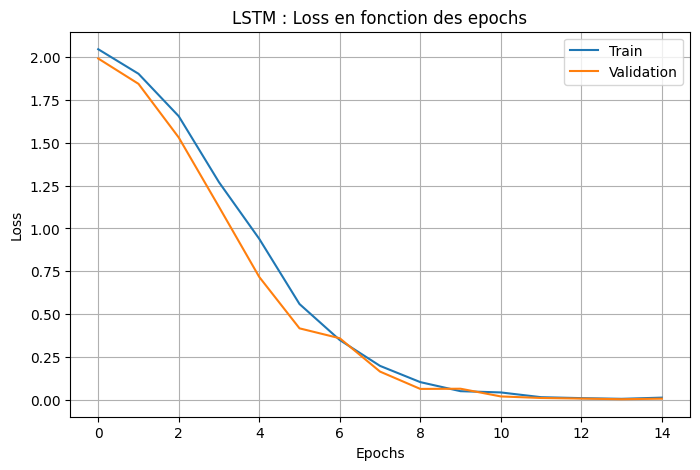

In [20]:
# Accuracy LSTM
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['accuracy'], label='Train')
plt.plot(history_lstm.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("LSTM : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss LSTM
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['loss'], label='Train')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("LSTM : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **Partie 3**

# **GRU (Gated Recurrent Unit)**

In [17]:
model_gru = Sequential()
model_gru.add(Embedding(max_words, 128, input_length=max_len))
model_gru.add(GRU(64, dropout=0.2))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(len(le.classes_), activation='softmax'))

model_gru.compile(loss='sparse_categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

history_gru = model_gru.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_gru = model_gru.evaluate(X_test, Y_test)
print("✅ Accuracy GRU :", score_gru[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.1750 - loss: 2.0466 - val_accuracy: 0.4179 - val_loss: 1.9324
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5084 - loss: 1.8684 - val_accuracy: 0.4030 - val_loss: 1.6766
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5637 - loss: 1.5546 - val_accuracy: 0.8657 - val_loss: 1.3600
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8441 - loss: 1.2152 - val_accuracy: 0.9552 - val_loss: 0.9810
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9388 - loss: 0.8433 - val_accuracy: 0.9552 - val_loss: 0.6702
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9927 - loss: 0.4975 - val_accuracy: 1.0000 - val_loss: 0.4099
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2928 - val_accuracy: 1.0000 - val_loss: 0.2500
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.1597 - val_accuracy: 1.0000 - val_loss: 0.1127


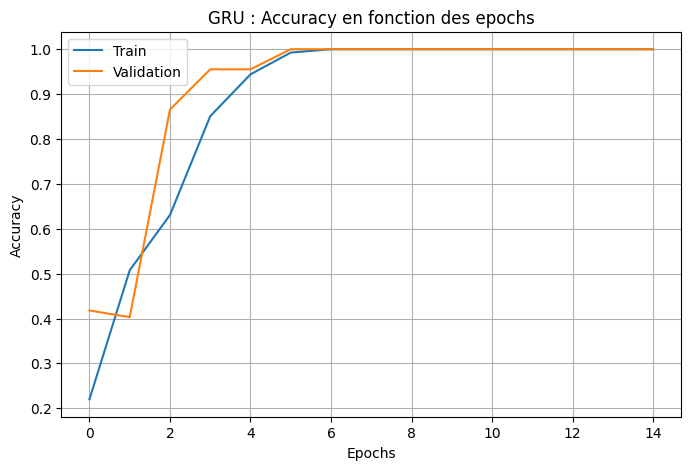

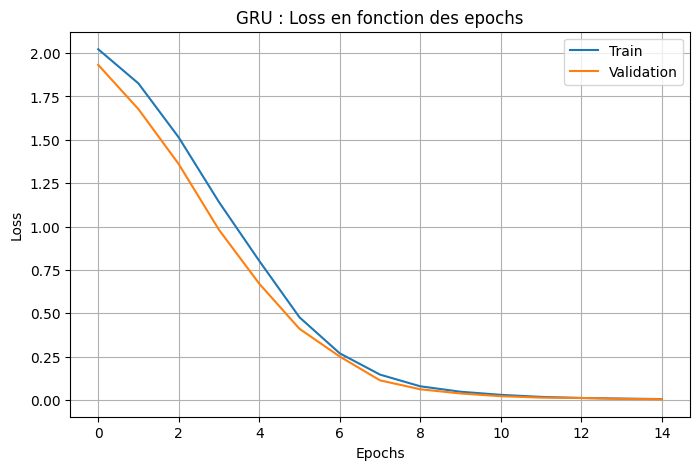

In [22]:
# Accuracy GRU
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['accuracy'], label='Train')
plt.plot(history_gru.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("GRU : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss GRU
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['loss'], label='Train')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("GRU : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **BGRU (Bidirectional GRU)**

In [15]:
model_bgru = Sequential()
model_bgru.add(Embedding(max_words, 128, input_length=max_len))
model_bgru.add(Bidirectional(GRU(64, dropout=0.2)))
model_bgru.add(Dense(32, activation='relu'))
model_bgru.add(Dense(len(le.classes_), activation='softmax'))

model_bgru.compile(loss='sparse_categorical_crossentropy',
                   optimizer=RMSprop(),
                   metrics=['accuracy'])

history_bgru = model_bgru.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_bgru = model_bgru.evaluate(X_test, Y_test)
print("✅ Accuracy BGRU :", score_bgru[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2318 - loss: 2.0507 - val_accuracy: 0.2836 - val_loss: 1.9529
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5714 - loss: 1.8721 - val_accuracy: 0.6418 - val_loss: 1.6694
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7783 - loss: 1.5250 - val_accuracy: 0.9552 - val_loss: 1.2413
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9820 - loss: 1.0615 - val_accuracy: 0.9254 - val_loss: 0.7722
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9805 - loss: 0.6052 - val_accuracy: 1.0000 - val_loss: 0.4138
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.3245 - val_accuracy: 1.0000 - val_loss: 0.1839
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1382 - val_accuracy: 1.0000 - val_loss: 0.0907
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0668 - val_accuracy: 1.0000 - val_loss: 0.0457


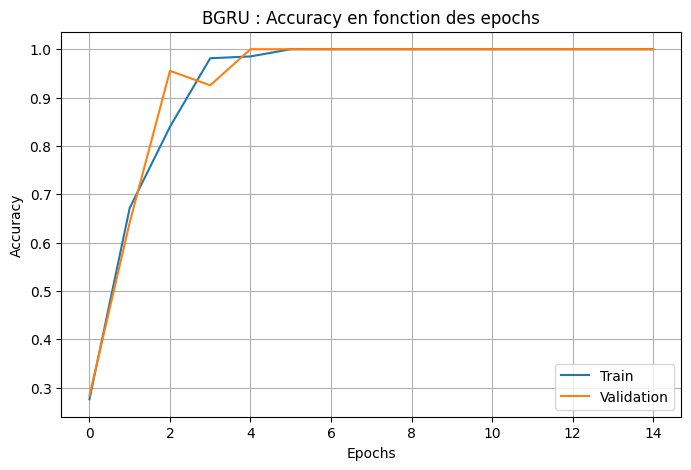

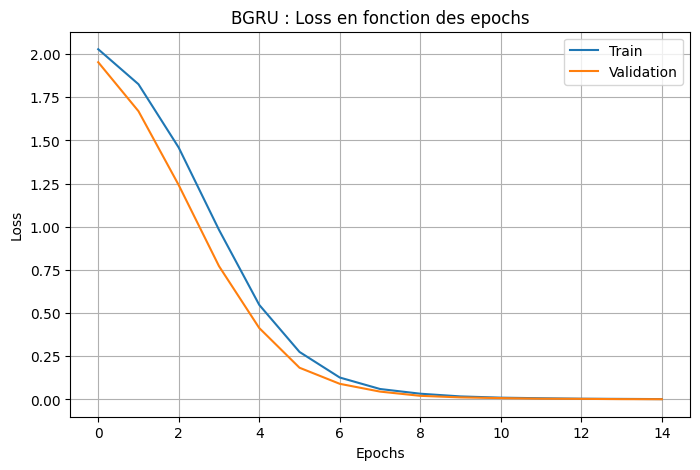

In [23]:
# Accuracy BGRU
plt.figure(figsize=(8,5))
plt.plot(history_bgru.history['accuracy'], label='Train')
plt.plot(history_bgru.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("BGRU : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss BGRU
plt.figure(figsize=(8,5))
plt.plot(history_bgru.history['loss'], label='Train')
plt.plot(history_bgru.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("BGRU : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


# **BLSTM (Bidirectional LSTM)**

In [14]:
model_blstm = Sequential()
model_blstm.add(Embedding(max_words, 128, input_length=max_len))
model_blstm.add(Bidirectional(LSTM(64, dropout=0.2)))
model_blstm.add(Dense(32, activation='relu'))
model_blstm.add(Dense(len(le.classes_), activation='softmax'))

model_blstm.compile(loss='sparse_categorical_crossentropy',
                    optimizer=RMSprop(),
                    metrics=['accuracy'])

history_blstm = model_blstm.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)

score_blstm = model_blstm.evaluate(X_test, Y_test)
print("✅ Accuracy BLSTM :", score_blstm[1])


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1734 - loss: 2.0692 - val_accuracy: 0.1940 - val_loss: 2.0383
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3212 - loss: 1.9911 - val_accuracy: 0.6716 - val_loss: 1.8899
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6601 - loss: 1.8168 - val_accuracy: 0.7313 - val_loss: 1.6244
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7995 - loss: 1.4935 - val_accuracy: 0.7015 - val_loss: 1.3077
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8486 - loss: 1.1253 - val_accuracy: 1.0000 - val_loss: 0.7959
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9679 - loss: 0.7655 - val_accuracy: 1.0000 - val_loss: 0.4689
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9741 - loss: 0.4755 - val_accuracy: 1.0000 - val_loss: 0.3130
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 1.0000 - loss: 0.2644 - val_accuracy: 0.9552 - val_loss: 0.1803


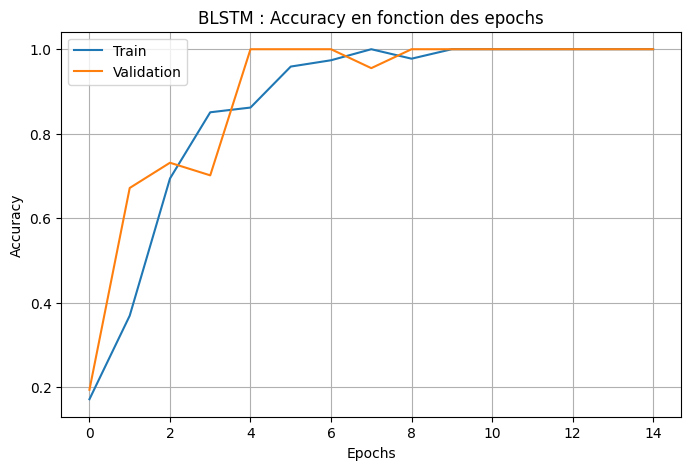

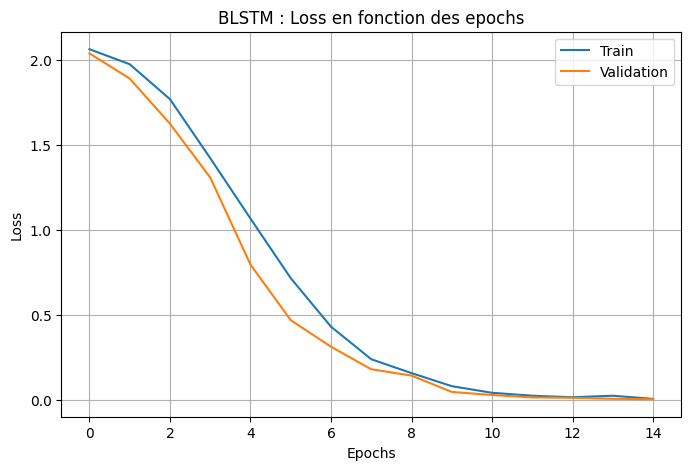

In [21]:
# Accuracy BLSTM
plt.figure(figsize=(8,5))
plt.plot(history_blstm.history['accuracy'], label='Train')
plt.plot(history_blstm.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("BLSTM : Accuracy en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss BLSTM
plt.figure(figsize=(8,5))
plt.plot(history_blstm.history['loss'], label='Train')
plt.plot(history_blstm.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("BLSTM : Loss en fonction des epochs")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print("🔹 Accuracy LSTM :", score_lstm[1])
print("🔹 Accuracy BLSTM :", score_blstm[1])
print("🔹 Accuracy GRU :", score_gru[1])
print("🔹 Accuracy BGRU :", score_bgru[1])


🔹 Accuracy LSTM : 1.0
🔹 Accuracy BLSTM : 1.0
🔹 Accuracy GRU : 1.0
🔹 Accuracy BGRU : 1.0
